In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv("/content/drive/MyDrive/Andrew Ng - ML practice/Linear Regression/ex1data1.txt",)

In [43]:
data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [44]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,-1].values

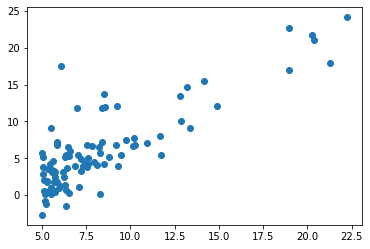

In [14]:
plt.scatter(X, Y)
plt.show()

In [46]:
new_column = np.ones((97,1))
X = np.append(new_column, X, axis=1)

In [50]:
iterations = 1500
alpha = 0.01

In [73]:
def cost_function(X, Y, theta):
  m = len(Y)
  J = np.sum((X.dot(theta) - Y) ** 2)/(2 * m)
  return J

In [72]:
def batch_gradient_descent(X, Y, theta, alpha, iterations):
  cost_history = [0] * iterations
  m = len(Y)
 
  for iteration in range(iterations):
 # print(iteration)
 # Hypothesis Values
    h = X.dot(theta)
 # Difference b/w Hypothesis and Actual Y
    loss = h - Y
 # Gradient Calculation
    gradient = X.T.dot(loss) / m
 # Changing Values of B using Gradient
    theta = theta - alpha * gradient
 # New Cost Value
    cost = cost_function(X, Y, theta)
    cost_history[iteration] = cost
 
  return theta, cost_history

In [70]:
# Splitting the dataset into training and testing sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [87]:
theta = np.zeros(X_train.shape[1])

In [88]:
theta.shape

(2,)

In [89]:
new_weights, cost_history = batch_gradient_descent(X_train, y_train, theta, alpha, iterations)

In [90]:
y_pred = X_test.dot(new_weights)

In [91]:
print(y_pred)

[3.2958073  7.32076598 7.24776474 3.07904072 4.71026519 3.84578922
 6.1255473  7.16769887 2.31570678 7.48961078 2.46759646 8.41083933
 8.45558203 2.32842313 2.28874342 9.25977311 8.2930954  2.72486696
 3.08257303 6.38870499]


In [94]:
print(cost_history)

[6.518584495761735, 6.036298138468596, 6.022354436724428, 6.016115287278704, 6.010026514310805, 6.0039641396010754, 5.99792603433606, 5.991912068313069, 5.985922144485909, 5.97995616673155, 5.974014039320014, 5.968095666904173, 5.962200954518065, 5.956329807575381, 5.9504821318679415, 5.944657833564186, 5.938856819207667, 5.9330789957155465, 5.927324270377112, 5.921592550852278, 5.915883745170111, 5.910197761727355, 5.904534509286953, 5.898893896976594, 5.8932758342872456, 5.887680231071709, 5.882106997543169, 5.87655604427375, 5.871027282193084, 5.8655206225868906, 5.860035977095536, 5.854573257712624, 5.849132376783593, 5.843713247004286, 5.838315781419576, 5.832939893421956, 5.827585496750149, 5.822252505487727, 5.8169408340617395, 5.811650397241321, 5.806381110136344, 5.801132888196052, 5.795905647207688, 5.7906993032951615, 5.785513772917696, 5.780348972868486, 5.775204820273366, 5.770081232589473, 5.764978127603939, 5.759895423432549, 5.754833038518442, 5.749790891630803, 5.74476

In [92]:
# Calculating r2 score

def r2(y_,y):
 sst = np.sum((y-y.mean())**2)
 ssr = np.sum((y_-y)**2)
 r2 = 1-(ssr/sst)
 return(r2)

In [93]:
r2(y_pred,y_test)

0.35578968492979557